# Linear Regression
- More info: [SKL](https://scikit-learn.org/stable/modules/linear_model.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../Datasets/Week7/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


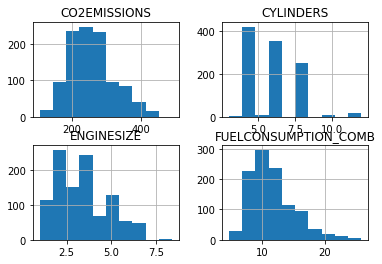

In [5]:
fig = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
fig.hist()
plt.show()

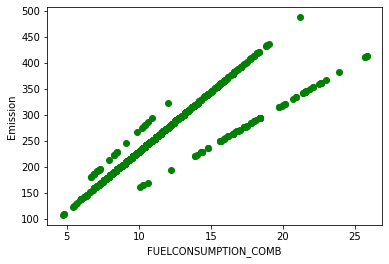

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

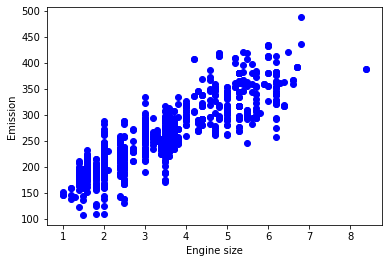

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice

plot __CYLINDER__ vs the Emission, to see how linear is their relation:

In [8]:
msk = np.random.rand(len(df)) < 0.8 # 80% of entire data for training and 20% fot testing
train = cdf[msk]
test = cdf[~msk]

<h2>Simple Regression Model</h2>

Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

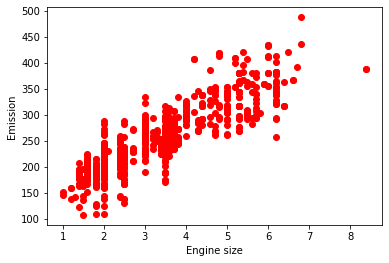

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[39.39117924]]
Intercept:  [123.6083537]


## Plot the Outputs

Text(0, 0.5, 'Emission')

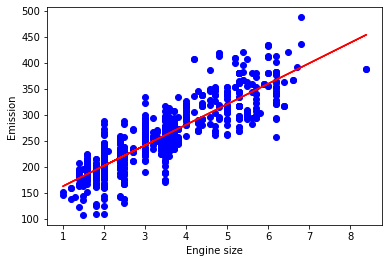

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y))



Mean absolute error: 22.97
Residual sum of squares (MSE): 861.65
R2-score: 0.72


In [13]:
# Train and test module
from sklearn.model_selection import train_test_split


In [14]:
# Load our dataset
df = pd.read_csv('../Datasets/Week7/salarios.csv')
df.head()

,exprience,Salary
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [15]:
df.shape

(30, 2)

In [16]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [17]:
# Test_size = % of our data
# random_state = modification of our data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
print(f' x train {x_train}')
print(f' y train {y_train}')
print(f' x test {x_test}')
print(f' y test {y_test}')

 x train [[10. ]
 [ 7. ]
 [ 2. ]
 [ 5.3]
 [ 8. ]
 [ 3. ]
 [ 2. ]
 [ 2. ]
 [ 2.1]
 [ 5. ]
 [ 8. ]
 [ 1. ]
 [ 4. ]
 [ 1. ]
 [ 3. ]
 [ 2. ]
 [10. ]
 [ 6. ]
 [10. ]
 [ 2.5]
 [10. ]
 [ 3.4]
 [ 5. ]
 [ 3. ]]
 y train [40000 35201 18200 27900 37000 19000 18302 17000 17500 28000 36302 15000
 26300 15000 19000 17301 42000 35201 42500 18103 42500 20000 33402 19201]
 x test [[5.4]
 [4. ]
 [5. ]
 [4. ]
 [3.2]
 [9.2]]
 y test [35000 25000 28000 27000 18300 40000]


In [18]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

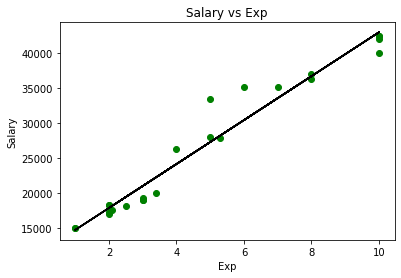

In [19]:
# Plot our train data

plotter = plt
plotter.scatter(x_train, y_train, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

Text(0, 0.5, 'Salary')

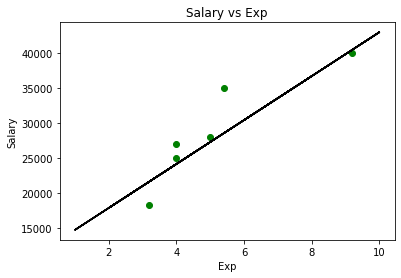

In [20]:
# plot our test data

plotter = plt
plotter.scatter(x_test, y_test, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

In [21]:
# Accuracy of our model
regr.score(x_test, y_test)

0.7862437374732998

### Prediction

[38774.08196966]


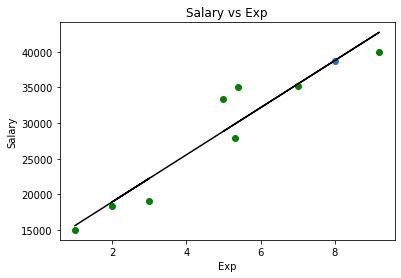

In [72]:
# If i have 8 years of exp
def prediction(x, model, x_train, y_train):
    '''
    x = years of exp
    model = Linear Regression trained
    x_train = X train Data
    y_train = Y train Data
    '''
    a = np.full(shape=(1,1), fill_value=x)
    a.reshape(1,-1)
    plt.scatter(x, model.predict(a))
    
    plt.scatter(x_train, y_train, color='green')
    plt.plot(x_train, model.predict(x_train), color='black')
    plt.title('Salary vs Exp')
    plt.xlabel('Exp')
    plt.ylabel('Salary')
    
    print(model.predict(a))


prediction(8,regr,x_train, y_train)

## With Country

In [48]:
# Adding country column
# Col = 0, Mex = 1, Chi = 2, Arg = 3
df['Country'] = np.random.randint(0, 4, df.shape[0])
df.head()

,exprience,Salary,Country
0,10.0,42500,2
1,8.0,36302,3
2,5.4,35000,0
3,2.5,18103,3
4,1.0,15000,2


In [49]:
col = df[df['Country'] == 0]
col.head()

,exprience,Salary,Country
2,5.4,35000,0
8,2.0,18302,0
9,10.0,42000,0
11,7.0,35201,0
14,2.0,17000,0


In [50]:
x = col.iloc[:, :-2].values
y = col.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(f' x train {x_train}')
print(f' y train {y_train}')
print(f' x test {x_test}')
print(f' y test {y_test}')

 x train [[1. ]
 [3. ]
 [2. ]
 [5.3]
 [9.2]
 [7. ]
 [5.4]
 [5. ]]
 y train [15000 19000 18302 27900 40000 35201 35000 33402]
 x test [[ 2.]
 [ 4.]
 [10.]]
 y test [17000 25000 42000]


Text(0, 0.5, 'Salary')

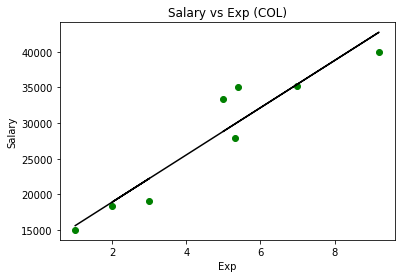

In [52]:
plotter = plt
plotter.scatter(x_train, y_train, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp (COL)')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

Text(0, 0.5, 'Salary')

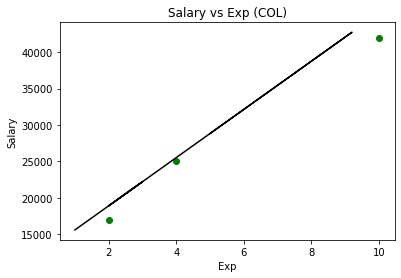

In [53]:
# plot our test data

plotter = plt
plotter.scatter(x_test, y_test, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp (COL)')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

In [54]:
# Accuracy of our model
regr.score(x_test, y_test)

0.9525444857809084

[38774.08196966]


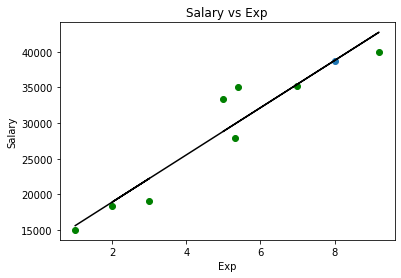

In [55]:
prediction(8,regr, x_train, y_train)

Text(0, 0.5, 'Salary')

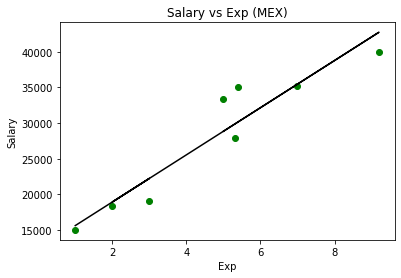

In [57]:
mex = df[df['Country'] == 1]
mex.head()
x = col.iloc[:, :-2].values
y = col.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
regr.fit(x_train, y_train)
plotter = plt
plotter.scatter(x_train, y_train, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp (MEX)')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

Text(0, 0.5, 'Salary')

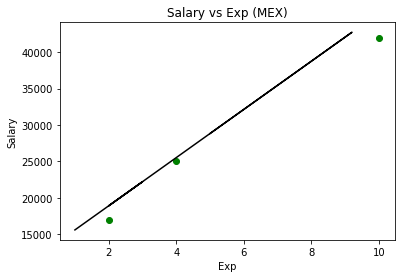

In [58]:
# plot our test data

plotter = plt
plotter.scatter(x_test, y_test, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp (MEX)')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

In [59]:
# Accuracy of our model
regr.score(x_test, y_test)

0.9525444857809084

[32154.33823347]


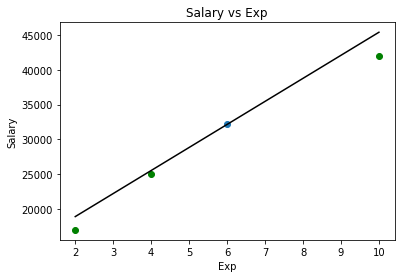

In [61]:
prediction(6,regr, x_test, y_test)

[38774.08196966]


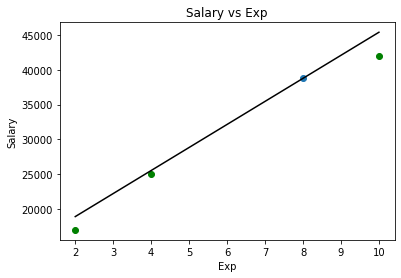

In [69]:
prediction(8,regr, x_test, y_test)